# Some EDA

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud   
from utils import *

In [2]:
!ls ../data/

BC2GM	     BC5CDR-disease  linnaeus	   s800
BC4CHEMD     devel_all.tsv   NCBI-disease  test_all.tsv
BC5CDR-chem  JNLPBA	     NERdata.zip   train_all.tsv


![](https://i.imgur.com/aBgXPZt.png)

# Load Data

In [3]:
#Data tags: IOB - Inside, Outside, Beginning. See [1, 2]
#[1]: https://github.com/dmis-lab/biobert/issues/56
#[2]: https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)

DATA_DIR = "../data"
TRAIN = "train_all.tsv"
DEV = "devel_all.tsv"
TEST = "test_all.tsv"

train_data = read_data(path(DATA_DIR, TRAIN))
dev_data = read_data(path(DATA_DIR, DEV))
test_data = read_data(path(DATA_DIR, TEST))

print(f"Len train_data: {len(train_data)}")
print(f"Len dev_data: {len(dev_data)}")
print(f"Len test_data: {len(test_data)}")

Len train_data: 90158
Len dev_data: 52007
Len test_data: 54564


# #Instances 

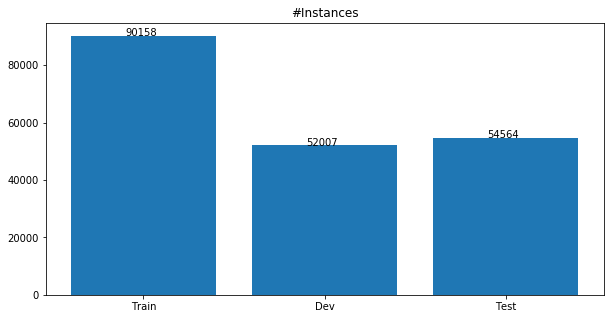

In [4]:
plt.figure(figsize=(10, 5))
plt.title("#Instances")
plt.bar(["Train", "Dev", "Test"],
        [len(train_data),
         len(dev_data),
         len(test_data)]
       )

hfix = -.1
plt.annotate(f"{len(train_data)}", (0+hfix, len(train_data)))
plt.annotate(f"{len(dev_data)}", (1+hfix, len(dev_data)))
plt.annotate(f"{len(test_data)}", (2+hfix, len(test_data)))

plt.show()

# #Entities

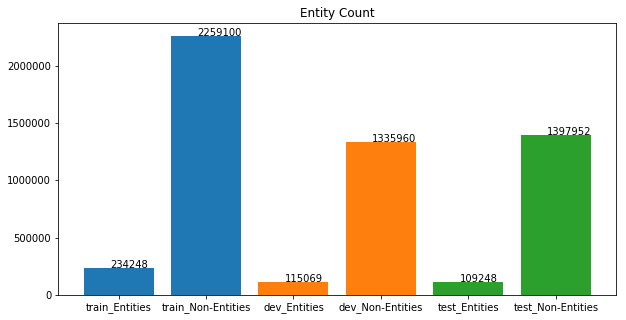

In [6]:
plt.figure(figsize=(10, 5))
plt.title("Entity Count")
for i, (data, data_name) in enumerate(zip(
        [train_data, dev_data, test_data],
        ["train", "dev", "test"])):
    
    data_labels = " ".join([x[0] for x in data])
    data_label_arr = np.array(data_labels.split())
    counts = np.unique(data_label_arr, return_counts=True)[1]
    label_count = counts[0] + counts[1]
    normal_count = counts[2]

    plt.bar([f"{data_name}_Entities", f"{data_name}_Non-Entities"],
            [label_count,
             normal_count,]
           )

    hfix = 2*i - .1
    plt.annotate(f"{label_count}", (0+hfix, label_count))
    plt.annotate(f"{normal_count}", (1+hfix, normal_count))

plt.show()

# WordCount

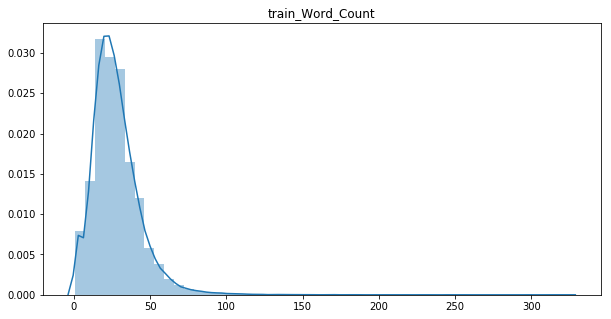

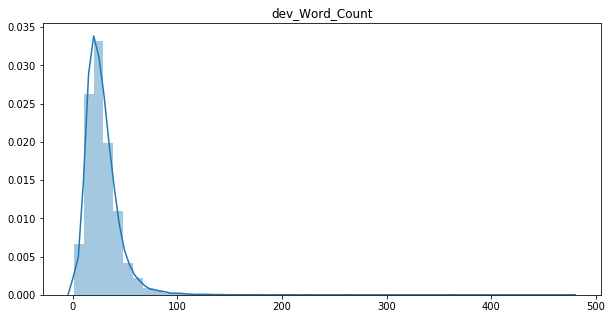

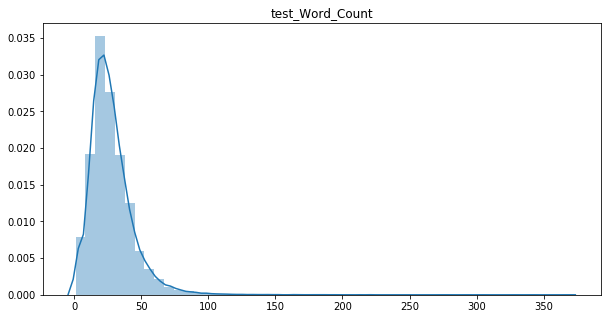

In [7]:
for i, (data, data_name) in enumerate(zip(
        [train_data, dev_data, test_data],
        ["train", "dev", "test"])):
    
    word_counts = [len(x[1].split()) for x in data]
    plt.figure(figsize=(10, 5))
    sns.distplot(word_counts)
    plt.title(f"{data_name}_Word_Count")
    plt.show()

# WordCloud for all the text

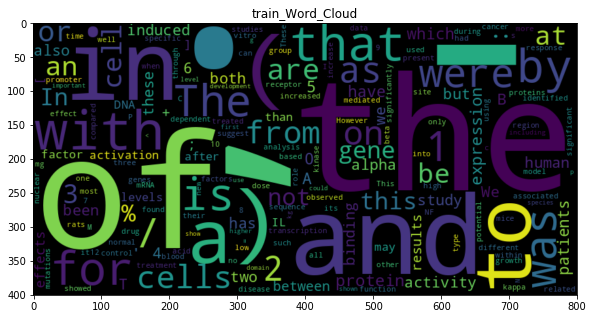

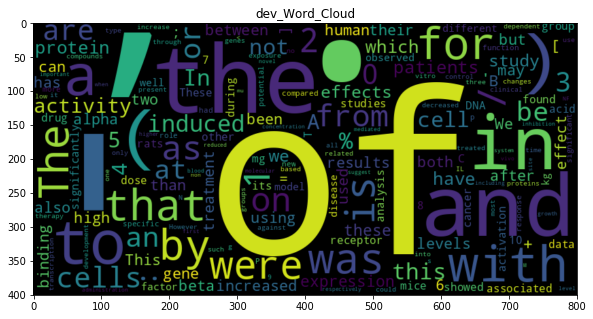

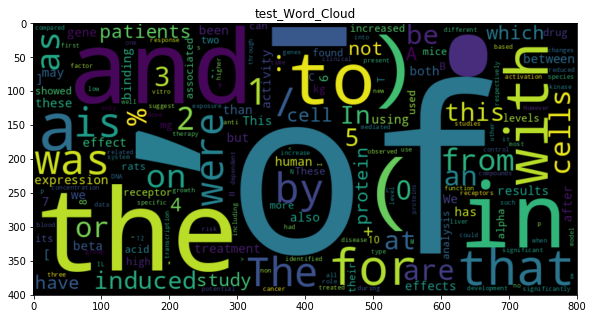

In [8]:
for i, (data, data_name) in enumerate(zip(
        [train_data, dev_data, test_data],
        ["train", "dev", "test"])):
    
    text = " ".join([x[1] for x in data])
    freq_dict = np.unique(
            np.array(text.split()), 
            return_counts=True
            )
    freq_dict = dict(zip(freq_dict[0], freq_dict[1]))
    
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, 
                height=400).generate_from_frequencies(freq_dict)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{data_name}_Word_Cloud")
    plt.show()

# WordCloud only for named entities

In [9]:
def get_nes_only(data):
    nes = []
    for instance in data:
        labels, text = instance
        labels, text = labels.split(), text.split()
        for i in range(len(labels)):
            if labels[i] != "O":
                nes.append(text[i])
    return nes            

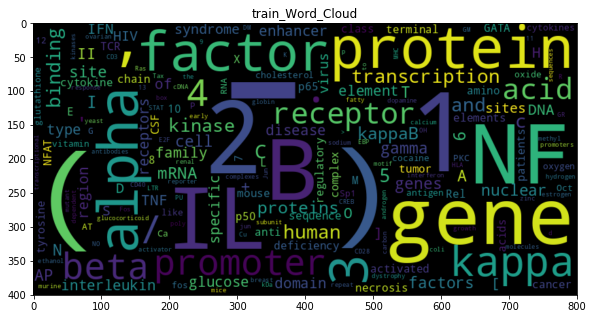

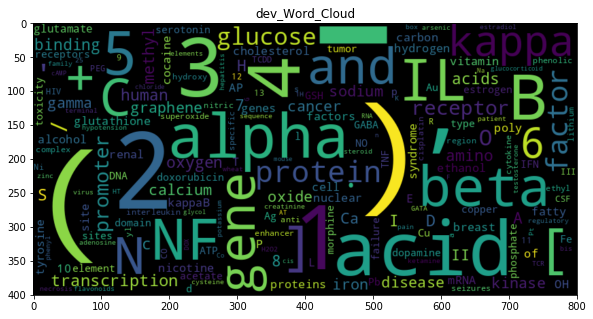

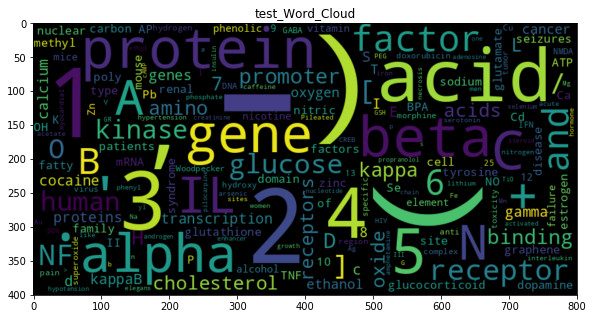

In [10]:
for i, (data, data_name) in enumerate(zip(
        [train_data, dev_data, test_data],
        ["train", "dev", "test"])):
    
    text = get_nes_only(data)
    freq_dict = np.unique(
            np.array(text), 
            return_counts=True
            )
    freq_dict = dict(zip(freq_dict[0], freq_dict[1]))
    
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, 
                height=400).generate_from_frequencies(freq_dict)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{data_name}_Word_Cloud")
    plt.show()